In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import cv2

# Define paths (adjust if needed)
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Classes
classes = ['angry', 'happy', 'neutral']
num_classes = len(classes)

# Image size
img_size = (48, 48)

In [3]:
# Data augmentation for train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% of train for validation
)

# Validation and test: only rescale
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=64,
    color_mode='grayscale',
    classes=classes,
    class_mode='categorical',
    subset='training'
)

# Validation generator (from train split)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=64,
    color_mode='grayscale',
    classes=classes,
    class_mode='categorical',
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=64,
    color_mode='grayscale',
    classes=classes,
    class_mode='categorical',
    shuffle=False  # For evaluation
)

# Compute class weights for imbalance
class_indices = train_generator.class_indices  # {'angry':0, 'happy':1, 'neutral':2}
y_train = train_generator.classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weights_dict}")

Found 12940 images belonging to 3 classes.
Found 3235 images belonging to 3 classes.
Found 3965 images belonging to 3 classes.
Class weights: {0: 1.3496036712557364, 1: 0.7472857472857473, 2: 1.085934877475663}


/Users/bhanukapannipitiya/Desktop/Campus/ComputerVision/emotion-recognition-project/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/bhanukapannipitiya/Desktop/Campus/ComputerVision/emotion-recognition-project/env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3602 - loss: 1.6874

203/203 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.3563 - loss: 1.5277 - val_accuracy: 0.3091 - val_loss: 1.1880
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3749 - loss: 1.2561

203/203 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.3796 - loss: 1.2105 - val_accuracy: 0.3564 - val_loss: 1.0889
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3945 - loss: 1.1304

203/203 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.4060 - loss: 1.1140 - val_accuracy: 0.5246 - val_loss: 1.0098
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4241 - loss: 1.0889

203/203 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.4291 - loss: 1.0789 - val_accuracy: 0.5604 - val_loss: 0.9790
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.4603 - loss: 1.0581 - val_accuracy: 0.5598 - val_loss: 0.9703
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.4645 - loss: 1.0463 - val_accuracy: 0.5236 - val_loss: 0.9813
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4869 - loss: 1.0372

203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.4933 - loss: 1.0305 - val_accuracy: 0.5685 - val_loss: 0.9330
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5145 - loss: 0.9937

203/203 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.5144 - loss: 0.9952 - val_accuracy: 0.6158 - val_loss: 0.8634
Epoch 9/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.5402 - loss: 0.9648 - val_accuracy: 0.5230 - val_loss: 0.9891
Epoch 10/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.5558 - loss: 0.9409 - val_accuracy: 0.5975 - val_loss: 0.9218
Epoch 11/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.5835 - loss: 0.9101

203/203 ━━━━━━━━━━━━━━━━━━━━ 25s 122ms/step - accuracy: 0.5819 - loss: 0.9108 - val_accuracy: 0.6671 - val_loss: 0.7670
Epoch 12/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.5895 - loss: 0.9041 - val_accuracy: 0.6402 - val_loss: 0.7712
Epoch 13/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.6039 - loss: 0.8776 - val_accuracy: 0.6624 - val_loss: 0.7698
Epoch 14/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6068 - loss: 0.8622

203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.6107 - loss: 0.8633 - val_accuracy: 0.6927 - val_loss: 0.7038
Epoch 15/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6200 - loss: 0.8535

203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.6175 - loss: 0.8522 - val_accuracy: 0.7014 - val_loss: 0.6793
Epoch 16/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.6267 - loss: 0.8439 - val_accuracy: 0.6906 - val_loss: 0.6997
Epoch 17/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6192 - loss: 0.8448

203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.6278 - loss: 0.8333 - val_accuracy: 0.7221 - val_loss: 0.6460
Epoch 18/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.6362 - loss: 0.8148 - val_accuracy: 0.7150 - val_loss: 0.6551
Epoch 19/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.6378 - loss: 0.8162 - val_accuracy: 0.6714 - val_loss: 0.7405
Epoch 20/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6428 - loss: 0.8031

203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.6464 - loss: 0.8066 - val_accuracy: 0.7437 - val_loss: 0.6148
Epoch 21/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.6485 - loss: 0.8000 - val_accuracy: 0.6417 - val_loss: 0.8390
Epoch 22/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.6582 - loss: 0.7820 - val_accuracy: 0.7014 - val_loss: 0.6757
Epoch 23/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.6595 - loss: 0.7769 - val_accuracy: 0.7289 - val_loss: 0.6297
Epoch 24/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.6614 - loss: 0.7820 - val_accuracy: 0.7366 - val_loss: 0.6154
Epoch 25/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.6641 - loss: 0.7750 - val_accuracy: 0.7416 - val_loss: 0.5935
Epoch 26/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.6762 - loss: 0.7642 - val_accuracy: 0.7308 - val_loss: 0.6312
Epoch 27/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.6654 - loss: 0.7634 - val_

203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.6836 - loss: 0.7498 - val_accuracy: 0.7490 - val_loss: 0.6245
Epoch 29/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.6705 - loss: 0.7586 - val_accuracy: 0.7434 - val_loss: 0.5970
Epoch 30/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.6849 - loss: 0.7416 - val_accuracy: 0.6757 - val_loss: 0.7755
Epoch 31/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.6917 - loss: 0.7393 - val_accuracy: 0.7066 - val_loss: 0.7078
Epoch 32/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.6917 - loss: 0.7308 - val_accuracy: 0.6306 - val_loss: 0.8302
Epoch 33/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.6872 - loss: 0.7309 - val_accuracy: 0.5428 - val_loss: 0.9613
Epoch 34/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.6825 - loss: 0.7356 - val_accuracy: 0.7490 - val_loss: 0.5951
Epoch 35/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6969 - loss: 0.7182

203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.6972 - loss: 0.7200 - val_accuracy: 0.7558 - val_loss: 0.5875
Epoch 36/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6924 - loss: 0.7255

203/203 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.6923 - loss: 0.7275 - val_accuracy: 0.7573 - val_loss: 0.5782
Epoch 37/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6981 - loss: 0.7141

203/203 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.6957 - loss: 0.7186 - val_accuracy: 0.7734 - val_loss: 0.5606
Epoch 38/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.6937 - loss: 0.7224 - val_accuracy: 0.7706 - val_loss: 0.5511
Epoch 39/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.7015 - loss: 0.7045 - val_accuracy: 0.7342 - val_loss: 0.6437
Epoch 40/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.7022 - loss: 0.7091 - val_accuracy: 0.7620 - val_loss: 0.5854
Epoch 41/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.7017 - loss: 0.7040 - val_accuracy: 0.7632 - val_loss: 0.5852
Epoch 42/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.7034 - loss: 0.7083 - val_accuracy: 0.7580 - val_loss: 0.5784
Epoch 43/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.6994 - loss: 0.7134 - val_accuracy: 0.7391 - val_loss: 0.6229
Epoch 44/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.7064 - loss: 0.6990 - va

203/203 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.7053 - loss: 0.7002 - val_accuracy: 0.7762 - val_loss: 0.5457
Epoch 46/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.7012 - loss: 0.7064 - val_accuracy: 0.6878 - val_loss: 0.7219
Epoch 47/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - accuracy: 0.7103 - loss: 0.6932 - val_accuracy: 0.7573 - val_loss: 0.5926
Epoch 48/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 34s 167ms/step - accuracy: 0.7077 - loss: 0.6920 - val_accuracy: 0.7521 - val_loss: 0.5741
Epoch 49/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - accuracy: 0.7193 - loss: 0.6803 - val_accuracy: 0.7611 - val_loss: 0.5857
Epoch 50/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.7075 - loss: 0.6958 - val_accuracy: 0.7638 - val_loss: 0.6004


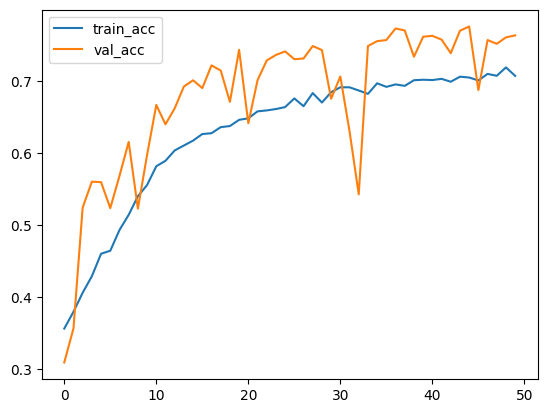

In [4]:
# Build custom CNN
model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('model1_best.h5', monitor='val_accuracy', save_best_only=True)

# Train
history1 = model1.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stop, checkpoint]
)

# Plot training
plt.plot(history1.history['accuracy'], label='train_acc')
plt.plot(history1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

/var/folders/kd/g45fdpkj14l6my0rn818s_n80000gn/T/ipykernel_91672/2337750319.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48,48,3))


Epoch 1/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4047 - loss: 1.5759

203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.4234 - loss: 1.3566 - val_accuracy: 0.4940 - val_loss: 1.0372
Epoch 2/50
202/203 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4445 - loss: 1.1243

203/203 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.4542 - loss: 1.0939 - val_accuracy: 0.5283 - val_loss: 0.9724
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4641 - loss: 1.0632

203/203 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.4634 - loss: 1.0586 - val_accuracy: 0.5345 - val_loss: 0.9804
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.4774 - loss: 1.0325 - val_accuracy: 0.5274 - val_loss: 0.9690
Epoch 5/50
202/203 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4880 - loss: 1.0226

203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.4920 - loss: 1.0211 - val_accuracy: 0.5366 - val_loss: 0.9539
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4872 - loss: 1.0306

203/203 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.4922 - loss: 1.0191 - val_accuracy: 0.5397 - val_loss: 0.9492
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5047 - loss: 1.0043

203/203 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.4955 - loss: 1.0152 - val_accuracy: 0.5428 - val_loss: 0.9470
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.4859 - loss: 1.0175 - val_accuracy: 0.5292 - val_loss: 0.9653
Epoch 9/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - accuracy: 0.4933 - loss: 1.0100 - val_accuracy: 0.5394 - val_loss: 0.9536
Epoch 10/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 26s 125ms/step - accuracy: 0.4953 - loss: 1.0071 - val_accuracy: 0.5385 - val_loss: 0.9483
Epoch 11/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.4959 - loss: 1.0082 - val_accuracy: 0.5348 - val_loss: 0.9484
Epoch 12/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4978 - loss: 1.0120

203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.4940 - loss: 1.0115 - val_accuracy: 0.5512 - val_loss: 0.9355
Epoch 13/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.5046 - loss: 0.9991 - val_accuracy: 0.5403 - val_loss: 0.9533
Epoch 14/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.4992 - loss: 1.0087 - val_accuracy: 0.5403 - val_loss: 0.9432
Epoch 15/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.4987 - loss: 1.0040 - val_accuracy: 0.5487 - val_loss: 0.9367
Epoch 16/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.5010 - loss: 1.0014 - val_accuracy: 0.5487 - val_loss: 0.9346
Epoch 17/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.4994 - loss: 1.0048 - val_accuracy: 0.5400 - val_loss: 0.9446
Epoch 18/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.5011 - loss: 1.0014 - val_accuracy: 0.5434 - val_loss: 0.9478
Epoch 19/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.5076 - loss: 0.9983 - va

203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.5133 - loss: 0.9907 - val_accuracy: 0.5626 - val_loss: 0.9250
Epoch 27/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.5080 - loss: 0.9946 - val_accuracy: 0.5617 - val_loss: 0.9251
Epoch 28/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.5142 - loss: 0.9869 - val_accuracy: 0.5453 - val_loss: 0.9321
Epoch 29/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.5133 - loss: 0.9925 - val_accuracy: 0.5360 - val_loss: 0.9426
Epoch 30/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.5181 - loss: 0.9843 - val_accuracy: 0.5515 - val_loss: 0.9240
Epoch 31/50
202/203 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5131 - loss: 0.9894

203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.5121 - loss: 0.9859 - val_accuracy: 0.5651 - val_loss: 0.9216
Epoch 32/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.5165 - loss: 0.9850 - val_accuracy: 0.5481 - val_loss: 0.9332
Epoch 33/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.5113 - loss: 0.9925 - val_accuracy: 0.5601 - val_loss: 0.9243
Epoch 34/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.5129 - loss: 0.9896 - val_accuracy: 0.5521 - val_loss: 0.9321
Epoch 35/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.5143 - loss: 0.9881 - val_accuracy: 0.5607 - val_loss: 0.9225
Epoch 36/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.5120 - loss: 0.9810 - val_accuracy: 0.5598 - val_loss: 0.9215
Epoch 37/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.5157 - loss: 0.9804 - val_accuracy: 0.5555 - val_loss: 0.9182
Epoch 38/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.5155 - loss: 0.9834 - val_

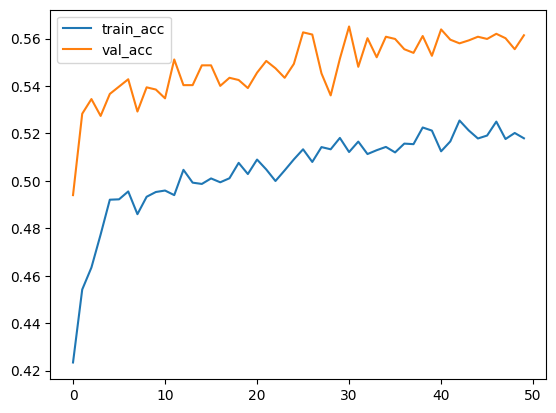

In [5]:
# For transfer, convert grayscale to RGB by repeating channels
def grayscale_to_rgb(x):
    return np.repeat(x, 3, axis=-1)

# Build transfer model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48,48,3))
base_model.trainable = False  # Freeze base

inputs = Input(shape=(48,48,1))
x = Concatenate()([inputs, inputs, inputs])  # Grayscale to RGB
x = base_model(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs, outputs)
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('model2_best.h5', monitor='val_accuracy', save_best_only=True)

# Train
history2 = model2.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stop, checkpoint]
)

# Plot training
plt.plot(history2.history['accuracy'], label='train_acc')
plt.plot(history2.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


Evaluating Custom CNN (Model1)...


/Users/bhanukapannipitiya/Desktop/Campus/ComputerVision/emotion-recognition-project/env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step

Classification Report for Custom CNN (Model1):
              precision    recall  f1-score   support

       angry     0.6868    0.7004    0.6935       958
       happy     0.9039    0.8427    0.8722      1774
     neutral     0.7174    0.7762    0.7456      1233

    accuracy                         0.7876      3965
   macro avg     0.7694    0.7731    0.7705      3965
weighted avg     0.7934    0.7876    0.7897      3965


Confusion Matrix for Custom CNN (Model1):
[[ 671   66  221]
 [ 123 1495  156]
 [ 183   93  957]]


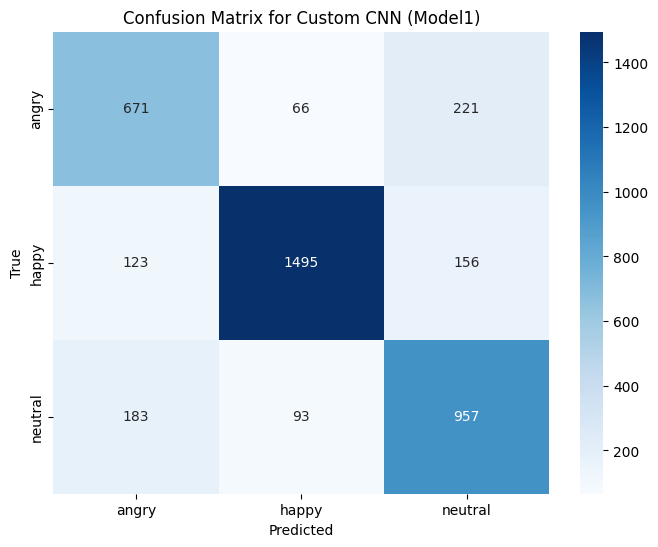


Evaluating MobileNetV2 Transfer Learning (Model2)...


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step

Classification Report for MobileNetV2 Transfer Learning (Model2):
              precision    recall  f1-score   support

       angry     0.4818    0.4144    0.4456       958
       happy     0.5943    0.7407    0.6595      1774
     neutral     0.5699    0.4298    0.4901      1233

    accuracy                         0.5652      3965
   macro avg     0.5487    0.5283    0.5317      3965
weighted avg     0.5595    0.5652    0.5551      3965


Confusion Matrix for MobileNetV2 Transfer Learning (Model2):
[[ 397  398  163]
 [ 223 1314  237]
 [ 204  499  530]]


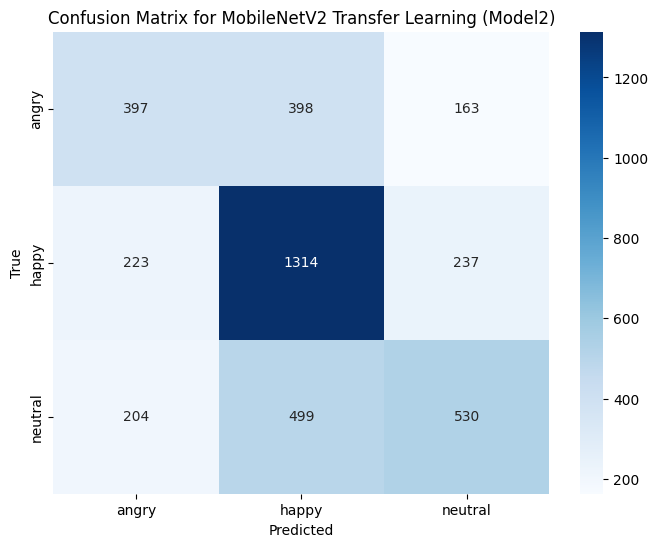

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# Function to evaluate a model and print metrics
def evaluate_model(model_path, model_name, test_generator, classes):
    print(f"\nEvaluating {model_name}...")
    
    # Load the model
    model = load_model(model_path)
    
    # Get predictions
    test_generator.reset()  # Reset generator to start
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes
    
    # Classification Report (Accuracy, Precision, Recall, F1-Score)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred_classes, target_names=classes, digits=4))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)
    
    # Plot Confusion Matrix as Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate both models
evaluate_model('model1_best.h5', 'Custom CNN (Model1)', test_generator, classes)
evaluate_model('model2_best.h5', 'MobileNetV2 Transfer Learning (Model2)', test_generator, classes)

In [8]:
import numpy as np
from sklearn.metrics import classification_report

# Function to summarize test results
def summarize_test_results(test_generator, classes):
    print("\n=== Test Results Summary ===")
    
    models = [
        ('model1_best.h5', 'Custom CNN (Model1)'),
        ('model2_best.h5', 'MobileNetV2 Transfer Learning (Model2)')
    ]
    
    for model_path, model_name in models:
        # Load model
        model = load_model(model_path)
        
        # Get predictions
        test_generator.reset()
        y_pred = model.predict(test_generator)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = test_generator.classes
        
        # Get classification report as dict for easy access
        report = classification_report(y_true, y_pred_classes, target_names=classes, output_dict=True)
        
        # Print summary
        print(f"\n{model_name}:")
        print(f"Accuracy: {report['accuracy']:.4f}")
        print(f"Macro Avg Precision: {report['macro avg']['precision']:.4f}")
        print(f"Macro Avg Recall: {report['macro avg']['recall']:.4f}")
        print(f"Macro Avg F1-Score: {report['macro avg']['f1-score']:.4f}")
        print(f"Weighted Avg F1-Score: {report['weighted avg']['f1-score']:.4f}")
        for cls in classes:
            print(f"{cls} F1-Score: {report[cls]['f1-score']:.4f}")

# Run summary
summarize_test_results(test_generator, classes)


=== Test Results Summary ===
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Custom CNN (Model1):
Accuracy: 0.7876
Macro Avg Precision: 0.7694
Macro Avg Recall: 0.7731
Macro Avg F1-Score: 0.7705
Weighted Avg F1-Score: 0.7897
angry F1-Score: 0.6935
happy F1-Score: 0.8722
neutral F1-Score: 0.7456


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step

MobileNetV2 Transfer Learning (Model2):
Accuracy: 0.5652
Macro Avg Precision: 0.5487
Macro Avg Recall: 0.5283
Macro Avg F1-Score: 0.5317
Weighted Avg F1-Score: 0.5551
angry F1-Score: 0.4456
happy F1-Score: 0.6595
neutral F1-Score: 0.4901


In [9]:
# Define preprocessing and prediction functions
def preprocess_image(image):
    """Preprocess image for model prediction"""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, img_size)
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, 48, 48, 1))
    return reshaped

def predict_emotion(image):
    """Predict emotion from preprocessed image using model1_best"""
    model = load_model('model1_best.h5')
    predictions = model.predict(image)[0]
    predicted_class = np.argmax(predictions)
    predicted_emotion = classes[predicted_class]
    confidence = predictions[predicted_class]
    return predicted_emotion, confidence, predictions

Running batch test on 10 random samples...
Testing model on 10 random samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


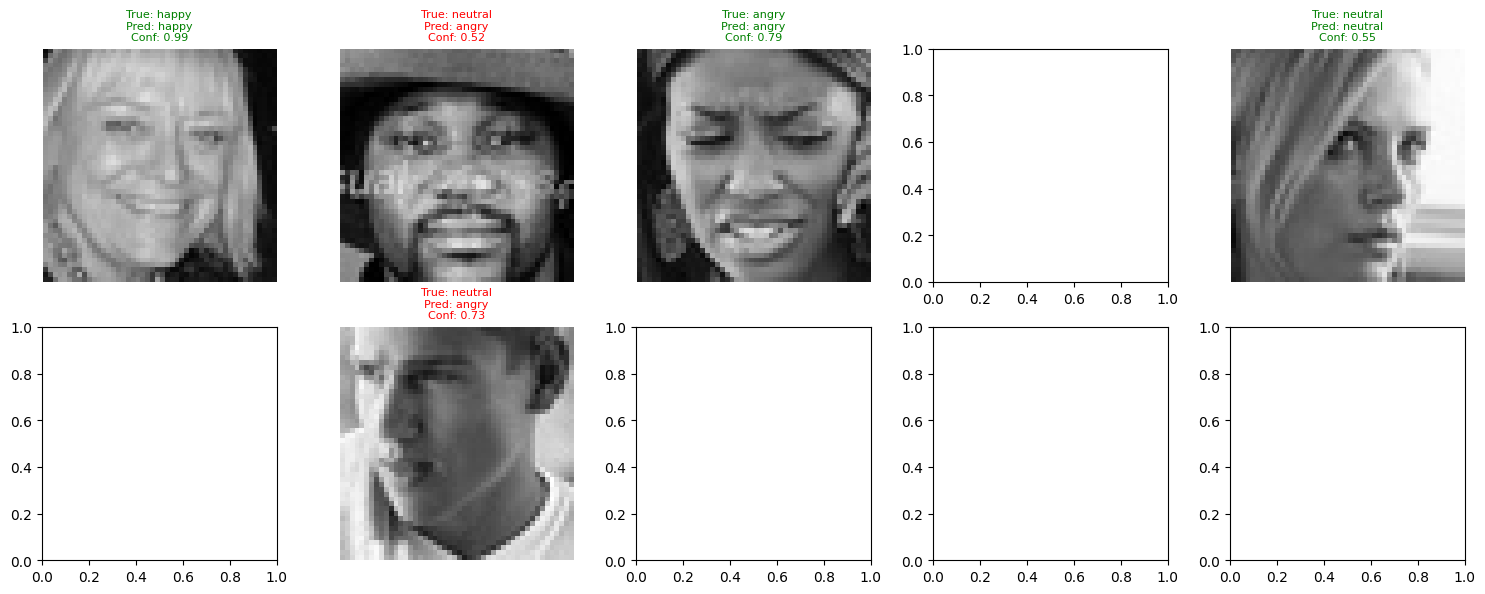


Batch Test Results:
Correct predictions: 3/5
Accuracy: 0.600


In [10]:
# Batch testing on multiple images
def batch_test_model(num_samples=10):
    """Test model on multiple random samples from test dataset"""
    import os
    import random
    
    print(f"Testing model on {num_samples} random samples...")
    
    correct_predictions = 0
    total_predictions = 0
    
    # Create figure for displaying results
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    for i in range(num_samples):
        # Get random test image
        test_dir = 'data/test'
        emotion_folders = os.listdir(test_dir)
        random_emotion = random.choice(emotion_folders)
        
        if random_emotion in classes:
            emotion_path = os.path.join(test_dir, random_emotion)
            image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]
            random_image = random.choice(image_files)
            image_path = os.path.join(emotion_path, random_image)
            
            # Load image
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Preprocess and predict
            processed_image = preprocess_image(image)
            predicted_emotion, confidence, _ = predict_emotion(processed_image)
            
            # Check if prediction is correct
            is_correct = predicted_emotion == random_emotion
            if is_correct:
                correct_predictions += 1
            total_predictions += 1
            
            # Display image
            axes[i].imshow(image_rgb)
            color = 'green' if is_correct else 'red'
            axes[i].set_title(f'True: {random_emotion}\nPred: {predicted_emotion}\nConf: {confidence:.2f}', 
                            color=color, fontsize=8)
            axes[i].axis('off')
    
    # Hide unused subplots
    for i in range(num_samples, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    print(f"\nBatch Test Results:")
    print(f"Correct predictions: {correct_predictions}/{total_predictions}")
    print(f"Accuracy: {accuracy:.3f}")
    
    return accuracy

# Run batch test
print("Running batch test on 10 random samples...")
batch_accuracy = batch_test_model(10)

Interactive Image Demo - Model1_best
Found 3965 test images

Testing on 5 random images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


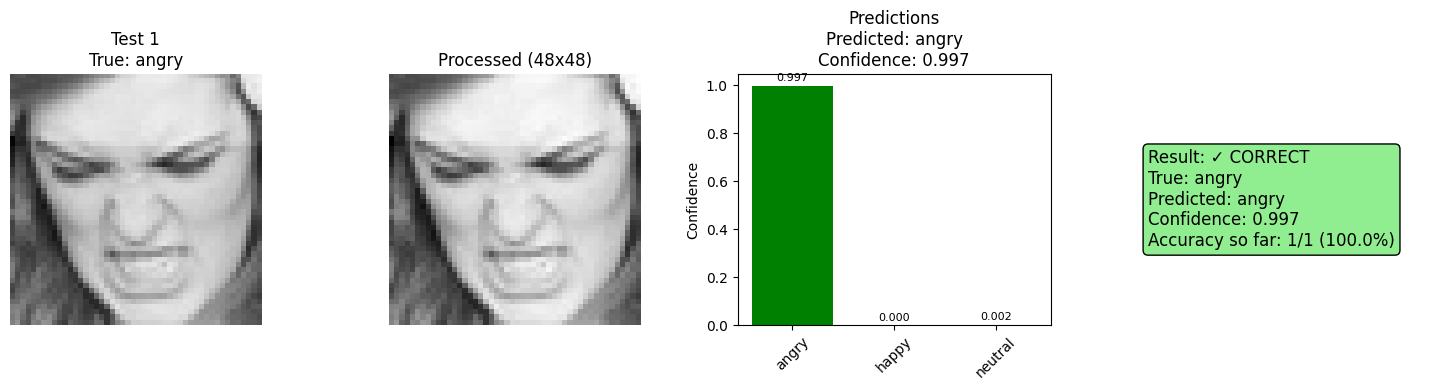

Test 1: True=angry, Predicted=angry, Correct=True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


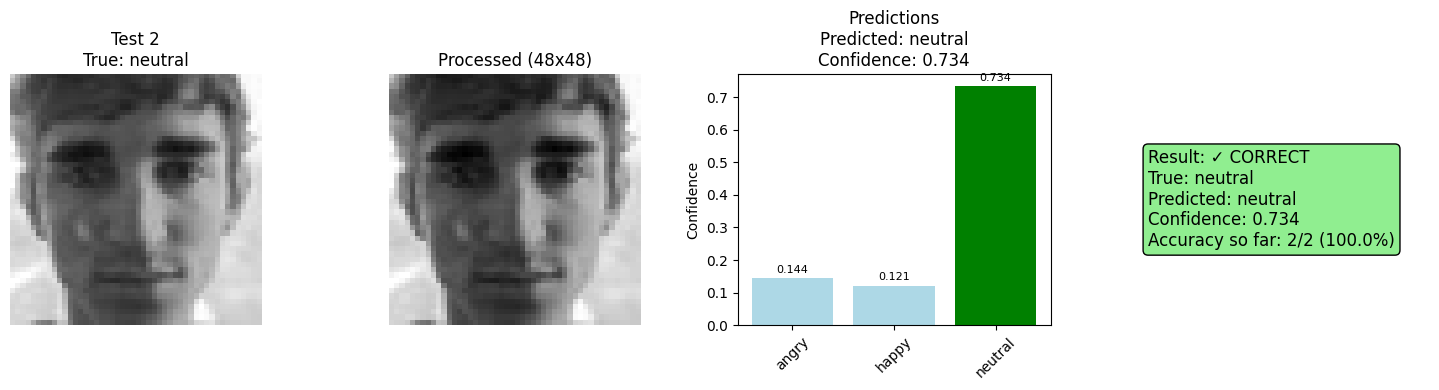

Test 2: True=neutral, Predicted=neutral, Correct=True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


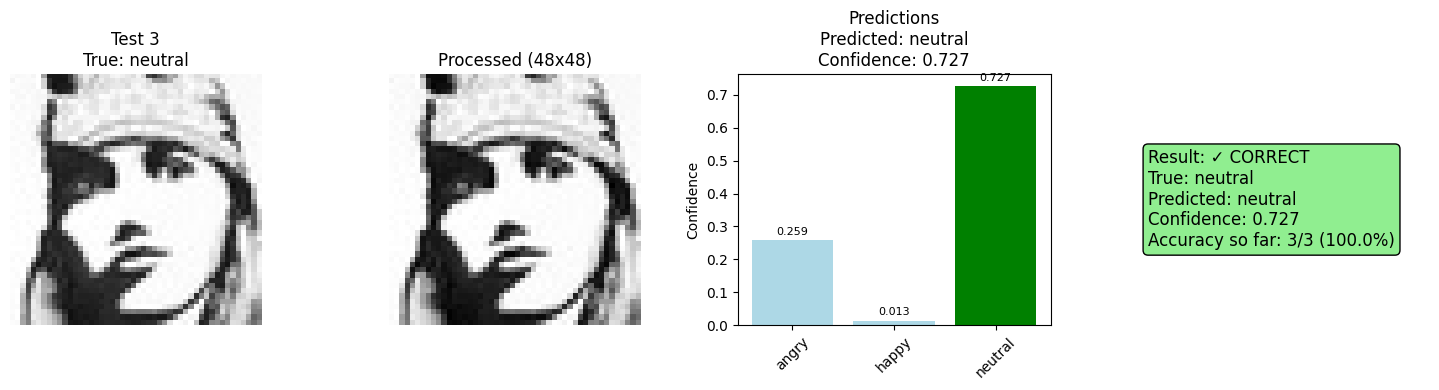

Test 3: True=neutral, Predicted=neutral, Correct=True


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


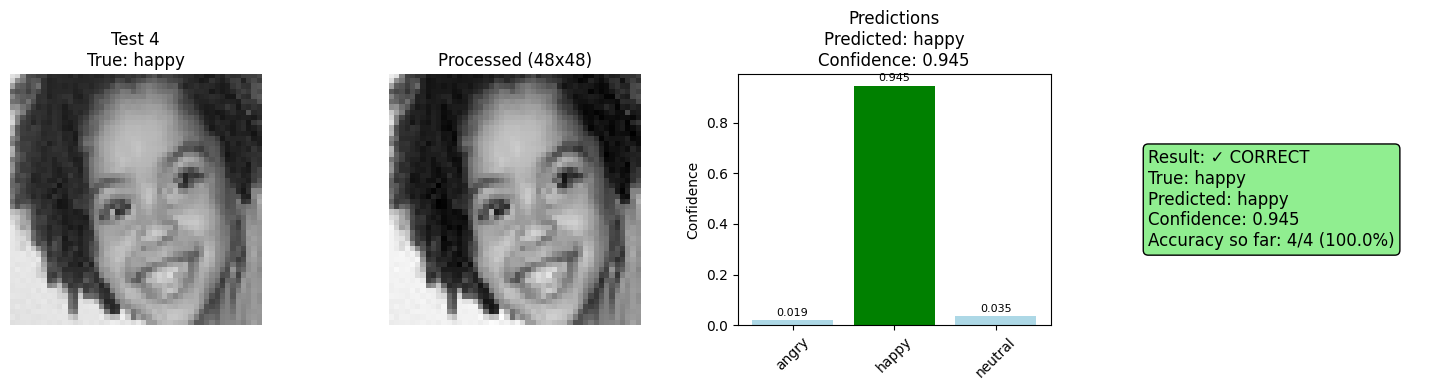

Test 4: True=happy, Predicted=happy, Correct=True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


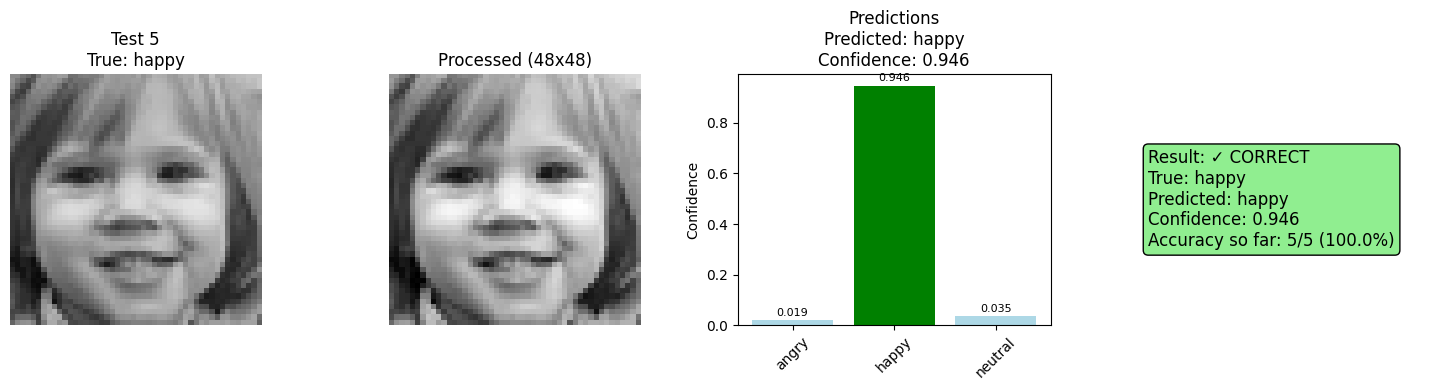

Test 5: True=happy, Predicted=happy, Correct=True

Final Results:
Correct: 5/5
Accuracy: 100.0%


In [11]:
# Alternative demo without webcam - Interactive image selection
def interactive_image_demo():
    """Interactive demo where you can select images to test"""
    import os
    import random
    
    print("Interactive Image Demo - Model1_best")
    print("=" * 50)
    
    # Get all available test images
    test_dir = 'data/test'
    all_images = []
    
    for emotion in classes:
        emotion_path = os.path.join(test_dir, emotion)
        if os.path.exists(emotion_path):
            image_files = [f for f in os.listdir(emotion_path) if f.endswith('.jpg')]
            for img_file in image_files:
                all_images.append((emotion, os.path.join(emotion_path, img_file)))
    
    print(f"Found {len(all_images)} test images")
    
    # Test on random samples
    num_tests = 5
    print(f"\nTesting on {num_tests} random images...")
    
    correct = 0
    total = 0
    
    for i in range(num_tests):
        # Select random image
        true_emotion, image_path = random.choice(all_images)
        
        # Load and process image
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        processed_image = preprocess_image(image)
        
        # Predict emotion
        predicted_emotion, confidence, all_predictions = predict_emotion(processed_image)
        
        # Check if correct
        is_correct = predicted_emotion == true_emotion
        if is_correct:
            correct += 1
        total += 1
        
        # Display results
        plt.figure(figsize=(15, 4))
        
        # Original image
        plt.subplot(1, 4, 1)
        plt.imshow(image_rgb)
        plt.title(f'Test {i+1}\nTrue: {true_emotion}', fontsize=12)
        plt.axis('off')
        
        # Processed image
        plt.subplot(1, 4, 2)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray_image, cmap='gray')
        plt.title('Processed (48x48)', fontsize=12)
        plt.axis('off')
        
        # Prediction bar chart
        plt.subplot(1, 4, 3)
        emotions = classes
        confidences = all_predictions
        colors = ['green' if e == predicted_emotion else 'lightblue' for e in emotions]
        
        bars = plt.bar(emotions, confidences, color=colors)
        plt.title(f'Predictions\nPredicted: {predicted_emotion}\nConfidence: {confidence:.3f}', fontsize=12)
        plt.ylabel('Confidence')
        plt.xticks(rotation=45)
        
        # Add confidence values on bars
        for bar, conf in zip(bars, confidences):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{conf:.3f}', ha='center', va='bottom', fontsize=8)
        
        # Result summary
        plt.subplot(1, 4, 4)
        result_text = f"Result: {'✓ CORRECT' if is_correct else '✗ WRONG'}\n"
        result_text += f"True: {true_emotion}\n"
        result_text += f"Predicted: {predicted_emotion}\n"
        result_text += f"Confidence: {confidence:.3f}\n"
        result_text += f"Accuracy so far: {correct}/{total} ({correct/total:.1%})"
        
        plt.text(0.1, 0.5, result_text, transform=plt.gca().transAxes, 
                fontsize=12, verticalalignment='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen" if is_correct else "lightcoral"))
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        print(f"Test {i+1}: True={true_emotion}, Predicted={predicted_emotion}, Correct={is_correct}")
    
    print(f"\nFinal Results:")
    print(f"Correct: {correct}/{total}")
    print(f"Accuracy: {correct/total:.1%}")
    
    return correct/total

# Run the interactive demo
interactive_accuracy = interactive_image_demo()